In [49]:
# imports
import pandas as pd
import numpy as np
import scipy
from math import sqrt
import matplotlib.pyplot as plt

# estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

# model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# cross validation
from sklearn.model_selection import train_test_split

In [50]:
data = pd.read_csv('creditclean.csv')

In [51]:
data.head()

ID  LIMIT_BAL     SEX   EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0  1.0      20000  female  university         1   24      2      2     -1   
1  2.0     120000  female  university         2   26     -1      2      0   
2  3.0      90000  female  university         2   34      0      0      0   
3  4.0      50000  female  university         1   37      0      0      0   
4  5.0      50000    male  university         1   57     -1      0     -1   

   PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -1  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                     default  
1      1000         0      2000                     default  
2      1000      1000      5000                 not default  
3      1100      1069      1000                 not default  
4      9000       689       679                 not default  

[5 rows x 25 columns]

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  float64
 1   LIMIT_BAL                   30000 non-null  int64  
 2   SEX                         30000 non-null  object 
 3   EDUCATION                   30000 non-null  object 
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  int64  
 13  BILL_AMT2                   300

In [53]:
data = pd.get_dummies(data)

In [54]:
data.head()

ID  LIMIT_BAL  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
0  1.0      20000         1   24      2      2     -1     -1     -2     -2   
1  2.0     120000         2   26     -1      2      0      0      0      2   
2  3.0      90000         2   34      0      0      0      0      0      0   
3  4.0      50000         1   37      0      0      0      0      0      0   
4  5.0      50000         1   57     -1      0     -1      0      0      0   

   ...  PAY_AMT5  PAY_AMT6  SEX_female  SEX_male  EDUCATION_graduate school  \
0  ...         0         0           1         0                          0   
1  ...         0      2000           1         0                          0   
2  ...      1000      5000           1         0                          0   
3  ...      1069      1000           1         0                          0   
4  ...       689       679           0         1                          0   

   EDUCATION_high school  EDUCATION_other  EDUCATION_university  \
0                      0                0                     1   
1                      0                0                     1   
2                      0                0                     1   
3                      0                0                     1   
4                      0                0                     1   

   default payment next month_default  default payment next month_not default  
0                                   1                                       0  
1                                   1                                       0  
2                                   0                                       1  
3                                   0                                       1  
4                                   0                                       1  

[5 rows x 30 columns]

In [55]:
data.describe()

ID       LIMIT_BAL      MARRIAGE           AGE         PAY_0  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.551867     35.485500     -0.016700   
std     8660.398374   129747.661567      0.521970      9.217904      1.123802   
min        1.000000    10000.000000      0.000000     21.000000     -2.000000   
25%     7500.750000    50000.000000      1.000000     28.000000     -1.000000   
50%    15000.500000   140000.000000      2.000000     34.000000      0.000000   
75%    22500.250000   240000.000000      2.000000     41.000000      0.000000   
max    30000.000000  1000000.000000      3.000000     79.000000      8.000000   

              PAY_2         PAY_3         PAY_4         PAY_5         PAY_6  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.133767     -0.166200     -0.220667     -0.266200     -0.291100   
std        1.197186      1.196868      1.169139      1.133187      1.149988   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

       ...       PAY_AMT5       PAY_AMT6    SEX_female      SEX_male  \
count  ...   30000.000000   30000.000000  30000.000000  30000.000000   
mean   ...    4799.387633    5215.502567      0.603733      0.396267   
std    ...   15278.305679   17777.465775      0.489129      0.489129   
min    ...       0.000000       0.000000      0.000000      0.000000   
25%    ...     252.500000     117.750000      0.000000      0.000000   
50%    ...    1500.000000    1500.000000      1.000000      0.000000   
75%    ...    4031.500000    4000.000000      1.000000      1.000000   
max    ...  426529.000000  528666.000000      1.000000      1.000000   

       EDUCATION_graduate school  EDUCATION_high school  EDUCATION_other  \
count               30000.000000           30000.000000     30000.000000   
mean                    0.352833               0.163900         0.015600   
std                     0.477859               0.370191         0.123924   
min                     0.000000               0.000000         0.000000   
25%                     0.000000               0.000000         0.000000   
50%                     0.000000               0.000000         0.000000   
75%                     1.000000               0.000000         0.000000   
max                     1.000000               1.000000         1.000000   

       EDUCATION_university  default payment next month_default  \
count          30000.000000                        30000.000000   
mean               0.467667                            0.221200   
std                0.498962                            0.415062   
min                0.000000                            0.000000   
25%                0.000000                            0.000000   
50%                0.000000                            0.000000   
75%                1.000000                            0.000000   
max                1.000000                            1.000000   

       default payment next month_not default  
count                            30000.000000  
mean                                 0.778800  
std                                  0.415062  
min                                  0.000000  
25%                                  1.000000  
50%                                  1.000000  
75%                                  1.000000  
max                                  1.000000  

[8 rows x 30 columns]

In [56]:
# get column names
header = data.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_female',
       'SEX_male', 'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_other', 'EDUCATION_university',
       'default payment next month_default',
       'default payment next month_not default'],
      dtype='object')


In [57]:
# features
x = data.iloc[:, 4:10]
print('Customers Repayment Status')
x.head()

Customers Repayment Status


PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6
0      2      2     -1     -1     -2     -2
1     -1      2      0      0      0      2
2      0      0      0      0      0      0
3      0      0      0      0      0      0
4     -1      0     -1      0      0      0

In [58]:
# dependent
y = data.iloc[:,1]
print('Customers Limit Balance')
y.head()

Customers Limit Balance


0     20000
1    120000
2     90000
3     50000
4     50000
Name: LIMIT_BAL, dtype: int64

In [59]:
model = LinearRegression(n_jobs = 10)
print(cross_val_score(model, x, y, cv = 3))

[0.09160873 0.1131427  0.10113375]


In [60]:
algotype = []
algotype.append(('Random Forest Regressor', RandomForestRegressor(max_depth = 10)))
algotype.append(('Linear Regression', LinearRegression(n_jobs = 10)))
algotype.append(('Support Vector Regression', SVR(max_iter = 10)))

In [61]:
# regression result
results = []
names = []
for name, model in algotype:
    result = cross_val_score(model, x, y, cv = 3, scoring = 'r2')
    names.append(name)
    results.append(result)

/Users/nicole/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/nicole/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/nicole/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [62]:
print(names)

['Random Forest Regressor', 'Linear Regression', 'Support Vector Regression']


In [63]:
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Regressor 0.11792912853846882
Linear Regression 0.10196172468288518
Support Vector Regression -2.33394114167796


In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 123)

In [65]:
randomF = RandomForestRegressor(max_depth=10)
randomFfit = randomF.fit(x_train, y_train)

In [66]:
randomFpredit = randomF.predict(x_test)

In [67]:
# square root mean squared error
rfR2 = r2_score(y_test, randomFpredit)
rmse = sqrt(mean_squared_error(y_test, randomFpredit))
print('R Squared: %.3f'% rfR2)
print('RMSE: %.3f'% rmse)

R Squared: 0.122
RMSE: 120165.332


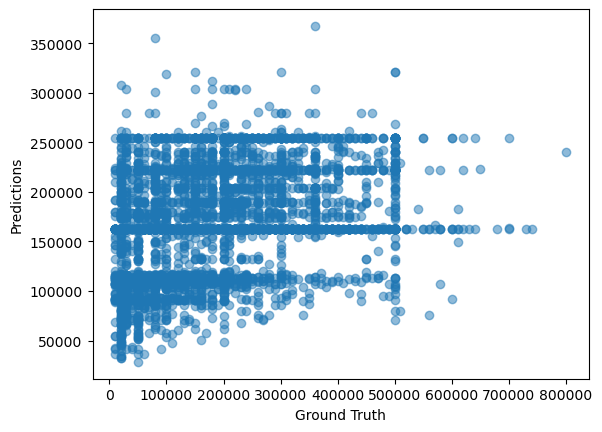

In [68]:
plt.scatter(y_test, randomFpredit, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()

In [69]:
data.head()

ID  LIMIT_BAL  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
0  1.0      20000         1   24      2      2     -1     -1     -2     -2   
1  2.0     120000         2   26     -1      2      0      0      0      2   
2  3.0      90000         2   34      0      0      0      0      0      0   
3  4.0      50000         1   37      0      0      0      0      0      0   
4  5.0      50000         1   57     -1      0     -1      0      0      0   

   ...  PAY_AMT5  PAY_AMT6  SEX_female  SEX_male  EDUCATION_graduate school  \
0  ...         0         0           1         0                          0   
1  ...         0      2000           1         0                          0   
2  ...      1000      5000           1         0                          0   
3  ...      1069      1000           1         0                          0   
4  ...       689       679           0         1                          0   

   EDUCATION_high school  EDUCATION_other  EDUCATION_university  \
0                      0                0                     1   
1                      0                0                     1   
2                      0                0                     1   
3                      0                0                     1   
4                      0                0                     1   

   default payment next month_default  default payment next month_not default  
0                                   1                                       0  
1                                   1                                       0  
2                                   0                                       1  
3                                   0                                       1  
4                                   0                                       1  

[5 rows x 30 columns]

In [70]:
# discretize age
custom_bucket_array = ([1,9,19,29,39,49,59,69,79,89])
custom_bucket_array

[1, 9, 19, 29, 39, 49, 59, 69, 79, 89]

In [71]:
data['age_group'] = pd.cut(data['AGE'], custom_bucket_array, labels = False) # get numeric outputs 1=10s, 2=20s...
data.info() # check data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      30000 non-null  float64
 1   LIMIT_BAL                               30000 non-null  int64  
 2   MARRIAGE                                30000 non-null  int64  
 3   AGE                                     30000 non-null  int64  
 4   PAY_0                                   30000 non-null  int64  
 5   PAY_2                                   30000 non-null  int64  
 6   PAY_3                                   30000 non-null  int64  
 7   PAY_4                                   30000 non-null  int64  
 8   PAY_5                                   30000 non-null  int64  
 9   PAY_6                                   30000 non-null  int64  
 10  BILL_AMT1                               30000 non-null  in

In [72]:
data.head()

ID  LIMIT_BAL  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
0  1.0      20000         1   24      2      2     -1     -1     -2     -2   
1  2.0     120000         2   26     -1      2      0      0      0      2   
2  3.0      90000         2   34      0      0      0      0      0      0   
3  4.0      50000         1   37      0      0      0      0      0      0   
4  5.0      50000         1   57     -1      0     -1      0      0      0   

   ...  PAY_AMT6  SEX_female  SEX_male  EDUCATION_graduate school  \
0  ...         0           1         0                          0   
1  ...      2000           1         0                          0   
2  ...      5000           1         0                          0   
3  ...      1000           1         0                          0   
4  ...       679           0         1                          0   

   EDUCATION_high school  EDUCATION_other  EDUCATION_university  \
0                      0                0                     1   
1                      0                0                     1   
2                      0                0                     1   
3                      0                0                     1   
4                      0                0                     1   

   default payment next month_default  default payment next month_not default  \
0                                   1                                       0   
1                                   1                                       0   
2                                   0                                       1   
3                                   0                                       1   
4                                   0                                       1   

   age_group  
0          2  
1          2  
2          3  
3          3  
4          5  

[5 rows x 31 columns]

In [73]:
# discretize limit balance
custom_limitBin = ([1,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,
                    550000,600000,650000,700000,750000,800000,850000,900000,950000,1000000])
custom_limitBin

[1,
 50000,
 100000,
 150000,
 200000,
 250000,
 300000,
 350000,
 400000,
 450000,
 500000,
 550000,
 600000,
 650000,
 700000,
 750000,
 800000,
 850000,
 900000,
 950000,
 1000000]

In [74]:
data['limit_group'] = pd.cut(data['LIMIT_BAL'], custom_limitBin, labels = False)
data.head()

ID  LIMIT_BAL  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
0  1.0      20000         1   24      2      2     -1     -1     -2     -2   
1  2.0     120000         2   26     -1      2      0      0      0      2   
2  3.0      90000         2   34      0      0      0      0      0      0   
3  4.0      50000         1   37      0      0      0      0      0      0   
4  5.0      50000         1   57     -1      0     -1      0      0      0   

   ...  SEX_female  SEX_male  EDUCATION_graduate school  \
0  ...           1         0                          0   
1  ...           1         0                          0   
2  ...           1         0                          0   
3  ...           1         0                          0   
4  ...           0         1                          0   

   EDUCATION_high school  EDUCATION_other  EDUCATION_university  \
0                      0                0                     1   
1                      0                0                     1   
2                      0                0                     1   
3                      0                0                     1   
4                      0                0                     1   

   default payment next month_default  default payment next month_not default  \
0                                   1                                       0   
1                                   1                                       0   
2                                   0                                       1   
3                                   0                                       1   
4                                   0                                       1   

   age_group  limit_group  
0          2            0  
1          2            2  
2          3            1  
3          3            0  
4          5            0  

[5 rows x 32 columns]

In [75]:
data = data.iloc[:, [0,1,31,2,3,30,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]]
data.head()

ID  LIMIT_BAL  limit_group  MARRIAGE  AGE  age_group  PAY_0  PAY_2  PAY_3  \
0  1.0      20000            0         1   24          2      2      2     -1   
1  2.0     120000            2         2   26          2     -1      2      0   
2  3.0      90000            1         2   34          3      0      0      0   
3  4.0      50000            0         1   37          3      0      0      0   
4  5.0      50000            0         1   57          5     -1      0     -1   

   PAY_4  ...  PAY_AMT5  PAY_AMT6  SEX_female  SEX_male  \
0     -1  ...         0         0           1         0   
1      0  ...         0      2000           1         0   
2      0  ...      1000      5000           1         0   
3      0  ...      1069      1000           1         0   
4      0  ...       689       679           0         1   

   EDUCATION_graduate school  EDUCATION_high school  EDUCATION_other  \
0                          0                      0                0   
1                          0                      0                0   
2                          0                      0                0   
3                          0                      0                0   
4                          0                      0                0   

   EDUCATION_university  default payment next month_default  \
0                     1                                   1   
1                     1                                   1   
2                     1                                   0   
3                     1                                   0   
4                     1                                   0   

   default payment next month_not default  
0                                       0  
1                                       0  
2                                       1  
3                                       1  
4                                       1  

[5 rows x 32 columns]

In [76]:
# import classification
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [77]:
# classifer feature
x = data.iloc[:, 6:12]
print('Customers Repayment Status')
x.head()

Customers Repayment Status


PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6
0      2      2     -1     -1     -2     -2
1     -1      2      0      0      0      2
2      0      0      0      0      0      0
3      0      0      0      0      0      0
4     -1      0     -1      0      0      0

In [78]:
# classifer dependent variable
y = data.iloc[:, 2:3]
print('Limit Balance Group')
y.head()

Limit Balance Group


limit_group
0            0
1            2
2            1
3            0
4            0

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=123)

In [80]:
decisionTree = DecisionTreeClassifier(max_depth=10)
decisionTreefit = decisionTree.fit(x_train, y_train)

In [81]:
decisionTreepred = decisionTreefit.predict(x_test)

In [82]:
print(classification_report(y_test, decisionTreepred))

              precision    recall  f1-score   support

           0       0.32      0.85      0.46      1537
           1       0.18      0.01      0.02       972
           2       0.10      0.02      0.03       781
           3       0.20      0.36      0.25       804
           4       0.15      0.03      0.06       605
           5       0.03      0.00      0.00       451
           6       0.00      0.00      0.00       234
           7       0.11      0.00      0.01       265
           8       0.00      0.00      0.00       117
           9       0.00      0.00      0.00       188
          10       0.00      0.00      0.00        11
          11       0.00      0.00      0.00        17
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1

    accuracy                           0.28      6000
   macro avg       0.07   

/Users/nicole/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nicole/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nicole/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
classifierType = []

classifierType.append(('Random Forest Classifier', RandomForestClassifier(max_depth = 10)))

classifierType.append(('Decision Tree Classifier', DecisionTreeClassifier(max_depth = 10)))

classifierType

[('Random Forest Classifier', RandomForestClassifier(max_depth=10)),
 ('Decision Tree Classifier', DecisionTreeClassifier(max_depth=10))]

In [84]:
results = []
names = []

for name, model in classifierType:
    result = cross_val_score(model, x, y, cv = 3, scoring = 'accuracy')
    names.append(name)
    results.append(result)

# output
for i in range (len(names)):
    print(names[i], results[i].mean())

/Users/nicole/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/Users/nicole/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nicole/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nicole/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

Random Forest Classifier 0.2775666666666667
Decision Tree Classifier 0.2751666666666666


/Users/nicole/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [85]:
# classifier feature
# x = data.iloc[:, 5:6]
# print('Customers Age Group')
# x.head()

In [86]:
# classifier dependent
# y = data.iloc[:, 2:3]
# print('Limit Balance Group')
# y.head()

In [87]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=123)
# decisionTree2 = DecisionTreeClassifier(max_depth=10)
# decisionTreefit2 = decisionTree2.fit(x_train, y_train)
# decisionTreepred2 = decisionTreefit2.predict(x_test)

In [88]:
# print(classification_report(y_test, decisionTreepred2))

In [89]:
# classifierType2 = []

# classifierType2.append(('Random Forest Classifier', RandomForestClassifier(max_depth = 10)))

# classifierType2.append(('Decision Tree Classifier', DecisionTreeClassifier(max_depth = 10)))

# classifierType2

In [90]:
# results2 = []
# names2 = []

# for name, model in classifierType:
#     result = cross_val_score(model, x, y, cv = 3, scoring = 'accuracy')
#     names2.append(name)
#     results2.append(result)

# # output
# for i in range (len(names)):
#     print(names2[i], results2[i].mean())

In [91]:
# classifier feature
x = data.iloc[:, 6:12]
print('Customers Repayment Status')
x.head()

Customers Repayment Status


PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6
0      2      2     -1     -1     -2     -2
1     -1      2      0      0      0      2
2      0      0      0      0      0      0
3      0      0      0      0      0      0
4     -1      0     -1      0      0      0

In [92]:
# classifier dependent variables
y = data.iloc[:, 30]
print('Default/Not-Default')
y.head()

Default/Not-Default


0    1
1    1
2    0
3    0
4    0
Name: default payment next month_default, dtype: uint8

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=123)
decisionTree3 = DecisionTreeClassifier(max_depth=10)
decisionTreefit3 = decisionTree3.fit(x_train, y_train)
decisionTreepred3 = decisionTreefit3.predict(x_test)

In [94]:
print(classification_report(y_test, decisionTreepred2))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4696
           1       0.00      0.00      0.00      1304
           3       0.00      0.00      0.00         0

    accuracy                           0.78      6000
   macro avg       0.26      0.33      0.29      6000
weighted avg       0.61      0.78      0.69      6000



/Users/nicole/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nicole/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nicole/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nicole/opt/anacon

In [95]:
classifierType3 = []

classifierType3.append(('Random Forest Classifier', RandomForestClassifier(max_depth = 10)))

classifierType3.append(('Decision Tree Classifier', DecisionTreeClassifier(max_depth = 10)))

classifierType3

[('Random Forest Classifier', RandomForestClassifier(max_depth=10)),
 ('Decision Tree Classifier', DecisionTreeClassifier(max_depth=10))]

In [96]:
results3 = []
names3 = []

for name, model in classifierType:
    result = cross_val_score(model, x, y, cv = 3, scoring = 'accuracy')
    names3.append(name)
    results3.append(result)

# output
for i in range (len(names)):
    print(names3[i], results3[i].mean())

Random Forest Classifier 0.8179666666666666
Decision Tree Classifier 0.8167
